In [45]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

For this Notebook we'll redo the steps in the preprocessing for each model. We're going to to do three models across regression and unsupervised learning.

<font size="12"> Regression </font>

In [4]:
scaled_X_train = pd.read_csv('scaled_X_train.csv')
scaled_X_test = pd.read_csv('scaled_X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [5]:
rModel = sm.OLS(y_train, scaled_X_train, hasconst=True)

In [6]:
reg_results = rModel.fit()
reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           IncomePerCap   R-squared:                     -16.819
Model:                            OLS   Adj. R-squared:                -17.757
Method:                 Least Squares   F-statistic:                    -17.93
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               1.00
Time:                        12:07:51   Log-Likelihood:                -7468.4
No. Observations:                 641   AIC:                         1.500e+04
Df Residuals:                     608   BIC:                         1.515e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           8.506e-10   1.48e-08      0.057      0.954   -2.82e-08    2.99e-08
1          -9572.3144   5.33e+04     -0.180      0.858   -1.14e+05    9.51e+04
2           1.587e+04   9.21e+04      0.172      0.863   -1.65e+05    1.97e+05
3          -1.039e+04   5.67e+04     -0.183      0.855   -1.22e+05    1.01e+05
4           1.669e+04   9.33e+04      0.179      0.858   -1.67e+05       2e+05
5           2.028e+04   1.08e+05      0.188      0.851   -1.91e+05    2.32e+05
6          -3.107e+04   1.83e+05     -0.169      0.866   -3.91e+05    3.29e+05
7          -1.117e+05   2.27e+06     -0.049      0.961   -4.57e+06    4.34e+06
8           5.751e+04   1.13e+06      0.051      0.959   -2.16e+06    2.27e+06
9           4.401e+04   1.14e+06      0.038      0.969    -2.2e+06    2.29e+06
10         -1122.5432   1.66e+04     -0.068      0.946   -3.38e+04    3.15e+04
11         -1760.4907   2.34e+04     -0.075      0.940   -4.77e+04    4.41e+04
12         -1378.7774   1.52e+04     -0.091      0.928   -3.12e+04    2.85e+04
13          -501.7339   6638.256     -0.076      0.940   -1.35e+04    1.25e+04
14          -114.3368   5679.960     -0.020      0.984   -1.13e+04     1.1e+04
15          -142.9213   2310.028     -0.062      0.951   -4679.524    4393.681
16          1700.7822    1.2e+05      0.014      0.989   -2.34e+05    2.38e+05
17          -394.3502   5.01e+04     -0.008      0.994   -9.87e+04    9.79e+04
18          -604.8556   3.71e+04     -0.016      0.987   -7.35e+04    7.23e+04
19           221.5674   5.06e+04      0.004      0.997   -9.91e+04    9.96e+04
20         -1178.5298   7.92e+04     -0.015      0.988   -1.57e+05    1.54e+05
21          1.149e+04    1.2e+05      0.096      0.924   -2.24e+05    2.47e+05
22          2481.8461    3.1e+04      0.080      0.936   -5.84e+04    6.34e+04
23          9622.9884    8.7e+04      0.111      0.912   -1.61e+05     1.8e+05
24          2093.3689   3.35e+04      0.063      0.950   -6.36e+04    6.78e+04
25          1626.0409   1.83e+04      0.089      0.929   -3.42e+04    3.75e+04
26          2395.4036   2.63e+04      0.091      0.927   -4.92e+04     5.4e+04
27           916.6860   1647.152      0.557      0.578   -2318.111    4151.483
28          1.033e+04   1.98e+04      0.521      0.603   -2.86e+04    4.93e+04
29         -2.897e+04   1.16e+05     -0.249      0.803   -2.57e+05    1.99e+05
30         -2.859e+04   1.11e+05     -0.257      0.798   -2.47e+05     1.9e+05
31         -7843.7063   3.33e+04     -0.235      0.814   -7.33e+04    5.76e+04
32          -312.6698   2146.545     -0.146      0.884   -4528.212    3902.872
33           131.0677   2169.405      0.060      0.952   -4129.368    4391.504
==============================================================================
Omnibus:                       76.722   Durbin-Watson:                   0.017
Pr

In [7]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [8]:
y_pred = reg_results.predict(scaled_X_test)

In [9]:
matches = pd.DataFrame(y_test)
matches.rename(columns={'IncomePerCap' : 'actual'}, inplace=True)
matches['predicted'] = y_pred

In [10]:
matches

,actual,predicted
0,23685,-4144.677952
1,24479,-2203.326212
2,48104,18695.479859
3,27847,340.623588
4,27057,-2275.440669
...,...,...
156,44152,15608.351993
157,24845,-5157.286074
158,24450,-3239.230293
159,22592,-3554.570116


In [11]:
rmse(matches["actual"], matches["predicted"])

28161.410020248757

Doing the regression analyses on the data from the pre-processor shows that the regressor cannot predict on the scaled and variance adjusted dataset and that I should not have done that for the regressor model. In the next section we will redo the pre-processing, leaving out the scaling and variance adjustment.

In [14]:
data = pd.read_csv('merged data.csv')
data = data.drop(columns = ['States', 'CensusId', 'IncomeErr', 'IncomePerCapErr'])
y = data['IncomePerCap']
X = data.drop(columns=['County', 'State', 'IncomePerCap', 'Poverty', 'ChildPoverty', 'Income', 'Citizen'])
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [15]:
rModel = sm.OLS(y_train, X_train, hasconst=True)
reg_results = rModel.fit()
reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           IncomePerCap   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     103.5
Date:                Wed, 07 Feb 2024   Prob (F-statistic):          1.31e-222
Time:                        12:18:43   Log-Likelihood:                -5947.9
No. Observations:                 641   AIC:                         1.196e+04
Df Residuals:                     608   BIC:                         1.211e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         3.843e+05   2.99e+05      1.286      0.199   -2.02e+05    9.71e+05
Female high school graduate or higher        -2.056e+05   9.54e+04     -2.154      0.032   -3.93e+05   -1.82e+04
Female Percent bachelor's degree or higher    1.288e+05   6.95e+04      1.854      0.064   -7647.561    2.65e+05
Male Percent high school graduate or higher   -1.97e+05   8.93e+04     -2.206      0.028   -3.72e+05   -2.17e+04
Male Percent bachelor's degree or higher      1.165e+05   6.51e+04      1.790      0.074   -1.13e+04    2.44e+05
Total Percent high school graduate or higher  4.229e+05   1.84e+05      2.294      0.022    6.08e+04    7.85e+05
Total Percent bachelor's degree or higher    -2.295e+05   1.35e+05     -1.705      0.089   -4.94e+05    3.48e+04
TotalPop                                        -0.0263      0.007     -3.845      0.000      -0.040      -0.013
Men                                              0.0407      0.017      2.422      0.016       0.008       0.074
Women                                           -0.0243      0.016     -1.525      0.128      -0.056       0.007
Hispanic                                       -66.9299    115.811     -0.578      0.564    -294.367     160.508
White                                          -92.0986    116.199     -0.793      0.428    -320.299     136.101
Black                                         -118.7744    116.904     -1.016      0.310    -348.360     110.811
Native                                        -124.5037    120.772     -1.031      0.303    -361.685     112.678
Asian                                          -70.4531    132.407     -0.532      0.595    -330.484     189.578
Pacific                                       -130.6867    413.682     -0.316      0.752    -943.106     681.733
Professional                                   248.4392   1627.146      0.153      0.879   -2947.069    3443.948
Service                                       -103.3896   1626.995     -0.064      0.949   -3298.602    3091.823
Office                                        -235.0399   1628.391     -0.144      0.885   -3432.993    2962.913
Construction                                   131.4898   1627.904      0.081      0.936   -3065.507    3328.487
Production                                    -177.0790   1628.808     -0.109      0.913   -3375.852    3021.694
Drive                                         1146.1678   1520.922      0.754      0.451   -1840.730    4133.065
Carpool                                        909.5168   1527.653      0.595      0.552   -2090.600    3909.634
Transit                                       1396.6992   1518.565      0.920      0.358   -1585.571    4378.969
Walk                            

In [16]:
y_pred = reg_results.predict(X_test)
matches = pd.DataFrame(y_test)
matches.rename(columns={'IncomePerCap' : 'actual'}, inplace=True)
matches['predicted'] = y_pred
rmse(matches["actual"], matches["predicted"])

4030.023162761065

Text(0, 0.5, 'Predicted')

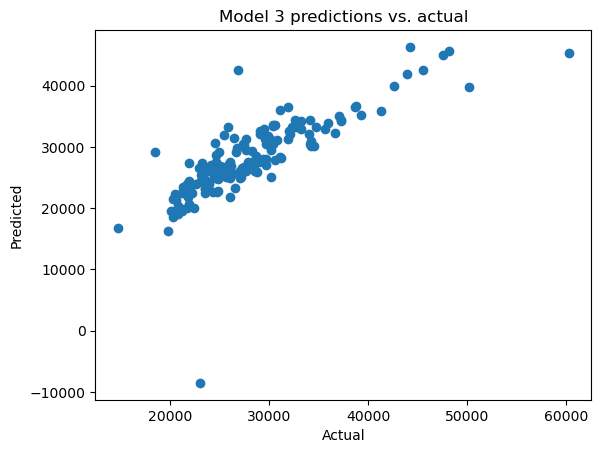

In [17]:
plt.scatter(y_test, y_pred)

# Label it nicely
plt.title("Model 3 predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

After rerunning the regression analysis it performed significantly better achieving an $r^{2}$ value of .845. There was one inredible outlier where the regressor predicted a negative value. In a more detailed project I would figure out what factors caused such a wrong prediction but for our purposes I chose to remove that sample from our dataset and rerun the analysis.

In [18]:
y_pred.reset_index(inplace=True, drop=True)
print(y_pred[y_pred < 0])

98   -8540.893078
dtype: float64


In [19]:
y_pred.sort_values(ascending = True, inplace=True)
print(y_pred)

98     -8540.893078
81     16257.179977
85     16790.123484
34     18515.716936
136    18967.845289
           ...     
23     42531.686803
97     45021.533909
18     45258.464515
2      45668.611525
156    46309.072047
Length: 161, dtype: float64


In [20]:
y_pred.iloc[0]

-8540.893077504628

In [21]:
y_pred.iloc[13]

21395.305060899023

In [22]:
data = pd.read_csv('merged data.csv')
data = data.drop(columns = ['States', 'CensusId', 'IncomeErr', 'IncomePerCapErr'])
y = data['IncomePerCap']
X = data.drop(columns=['County', 'State', 'IncomePerCap', 'Poverty', 'ChildPoverty', 'Income', 'Citizen'])
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [23]:
X_test.drop(98, inplace=True)
y_test.drop(98, inplace=True)

In [24]:
rModel = sm.OLS(y_train, X_train, hasconst=True)
reg_results = rModel.fit()
reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           IncomePerCap   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     103.5
Date:                Wed, 07 Feb 2024   Prob (F-statistic):          1.31e-222
Time:                        12:18:44   Log-Likelihood:                -5947.9
No. Observations:                 641   AIC:                         1.196e+04
Df Residuals:                     608   BIC:                         1.211e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         3.843e+05   2.99e+05      1.286      0.199   -2.02e+05    9.71e+05
Female high school graduate or higher        -2.056e+05   9.54e+04     -2.154      0.032   -3.93e+05   -1.82e+04
Female Percent bachelor's degree or higher    1.288e+05   6.95e+04      1.854      0.064   -7647.561    2.65e+05
Male Percent high school graduate or higher   -1.97e+05   8.93e+04     -2.206      0.028   -3.72e+05   -2.17e+04
Male Percent bachelor's degree or higher      1.165e+05   6.51e+04      1.790      0.074   -1.13e+04    2.44e+05
Total Percent high school graduate or higher  4.229e+05   1.84e+05      2.294      0.022    6.08e+04    7.85e+05
Total Percent bachelor's degree or higher    -2.295e+05   1.35e+05     -1.705      0.089   -4.94e+05    3.48e+04
TotalPop                                        -0.0263      0.007     -3.845      0.000      -0.040      -0.013
Men                                              0.0407      0.017      2.422      0.016       0.008       0.074
Women                                           -0.0243      0.016     -1.525      0.128      -0.056       0.007
Hispanic                                       -66.9299    115.811     -0.578      0.564    -294.367     160.508
White                                          -92.0986    116.199     -0.793      0.428    -320.299     136.101
Black                                         -118.7744    116.904     -1.016      0.310    -348.360     110.811
Native                                        -124.5037    120.772     -1.031      0.303    -361.685     112.678
Asian                                          -70.4531    132.407     -0.532      0.595    -330.484     189.578
Pacific                                       -130.6867    413.682     -0.316      0.752    -943.106     681.733
Professional                                   248.4392   1627.146      0.153      0.879   -2947.069    3443.948
Service                                       -103.3896   1626.995     -0.064      0.949   -3298.602    3091.823
Office                                        -235.0399   1628.391     -0.144      0.885   -3432.993    2962.913
Construction                                   131.4898   1627.904      0.081      0.936   -3065.507    3328.487
Production                                    -177.0790   1628.808     -0.109      0.913   -3375.852    3021.694
Drive                                         1146.1678   1520.922      0.754      0.451   -1840.730    4133.065
Carpool                                        909.5168   1527.653      0.595      0.552   -2090.600    3909.634
Transit                                       1396.6992   1518.565      0.920      0.358   -1585.571    4378.969
Walk                            

In [25]:
y_pred = reg_results.predict(X_test)
matches = pd.DataFrame(y_test)
matches.rename(columns={'IncomePerCap' : 'actual'}, inplace=True)
matches['predicted'] = y_pred
rmse(matches["actual"], matches["predicted"])

3184.876033986261

Text(0, 0.5, 'Predicted')

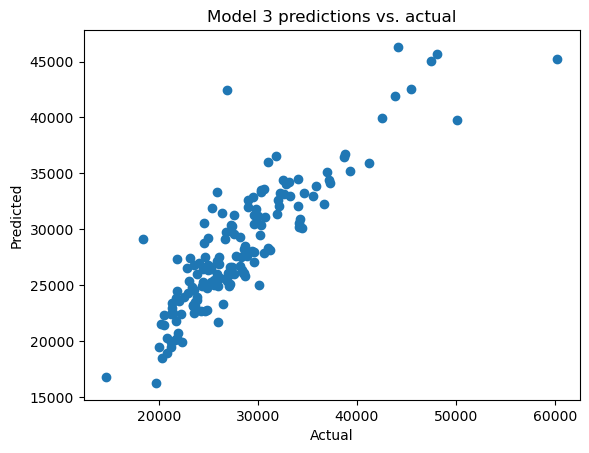

In [26]:
plt.scatter(y_test, y_pred)

# Label it nicely
plt.title("Model 3 predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

After rerunning the code with signicantly wrong predicted outlier sample removed I see that the $r^{2}$ has not changed. Our RMSE score did go down from over 4000 to 3200 however showing how much the one sample skewed that single metric with its prediction.

<font size="12"> K-Means Classification </font>

We will run some unsupervised learning models on the data to see if they can identify any clusters that could be useful in learning more about our data. If the models can successfully divide the data into clusters we can attempt to determine what factors are most important to the clustering.

In [27]:
X = pd.read_csv('X_classifier.csv')

C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.18959925916546463


C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.13749968606231935


C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.14089676262955714


C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.12295012628138667


C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.12596425561515978


C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.10923366672562716


C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.11124637088684561


C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.11678239957765649


C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.13202636261831832


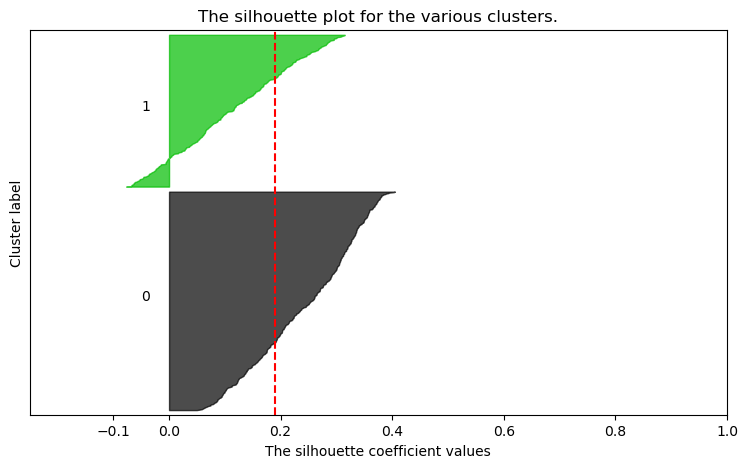

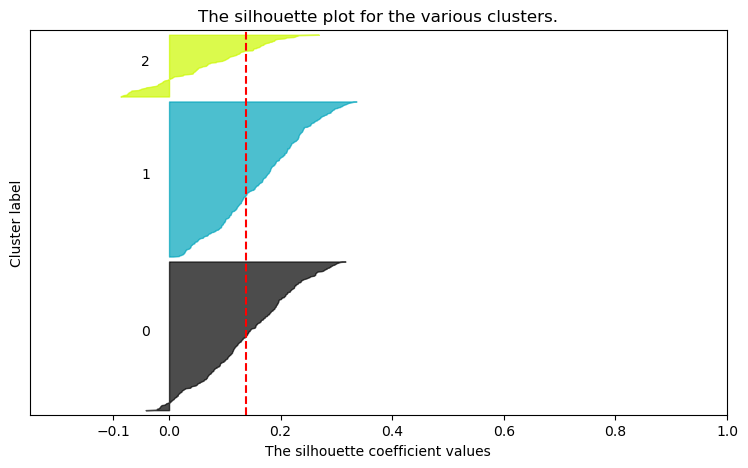

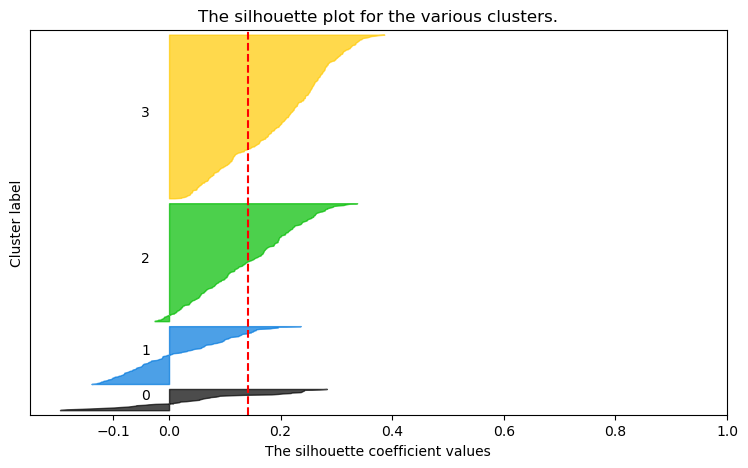

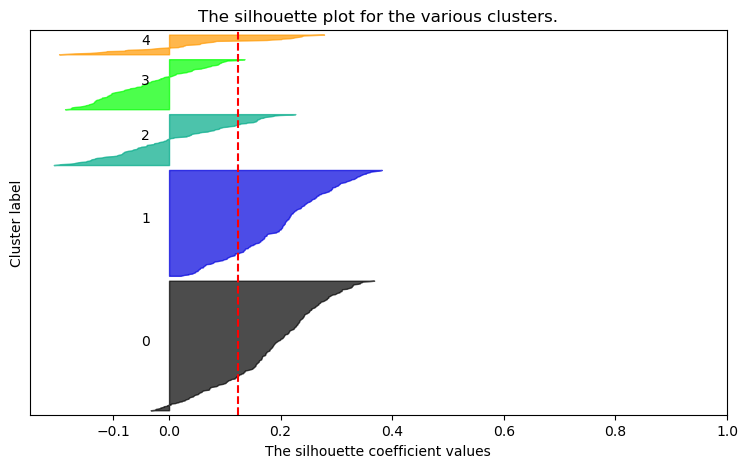

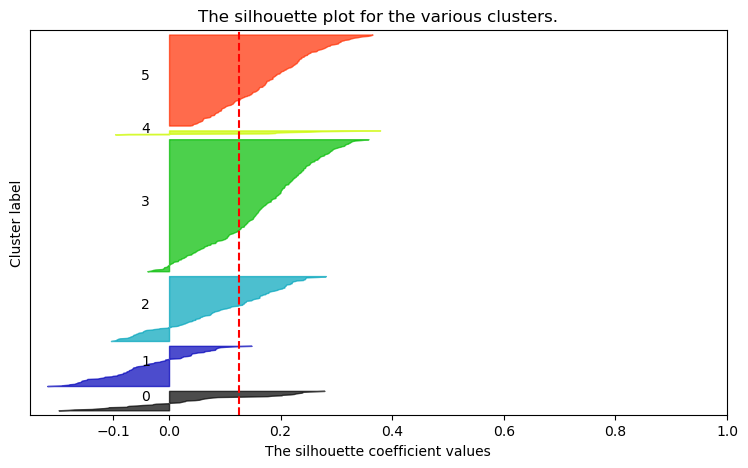

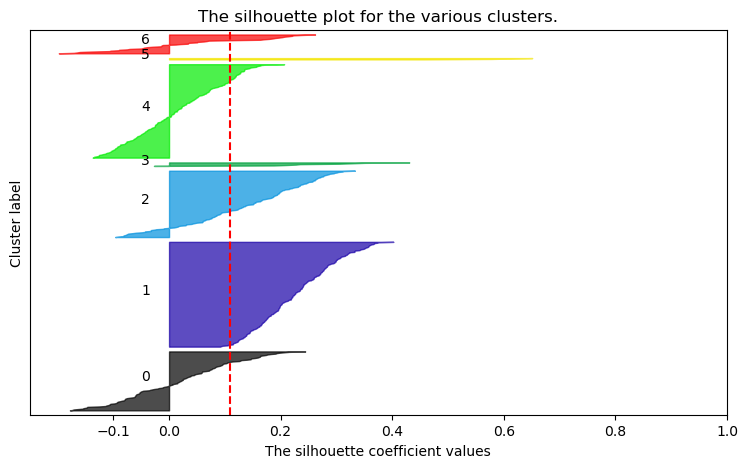

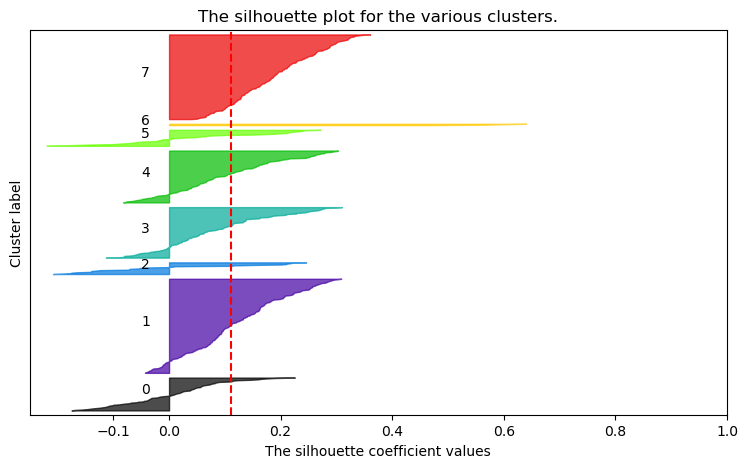

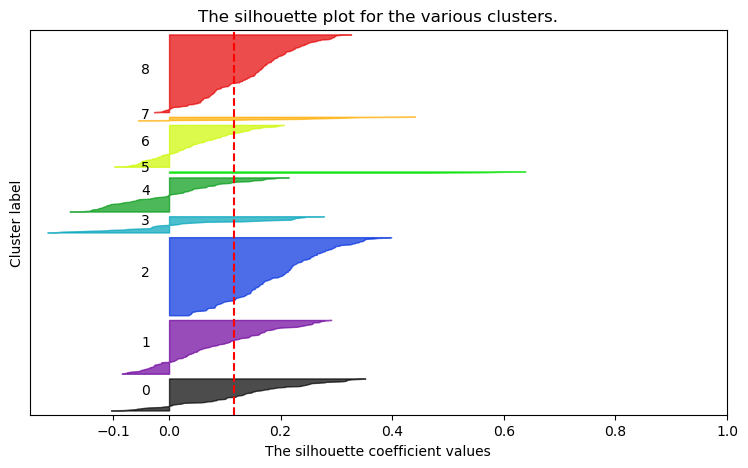

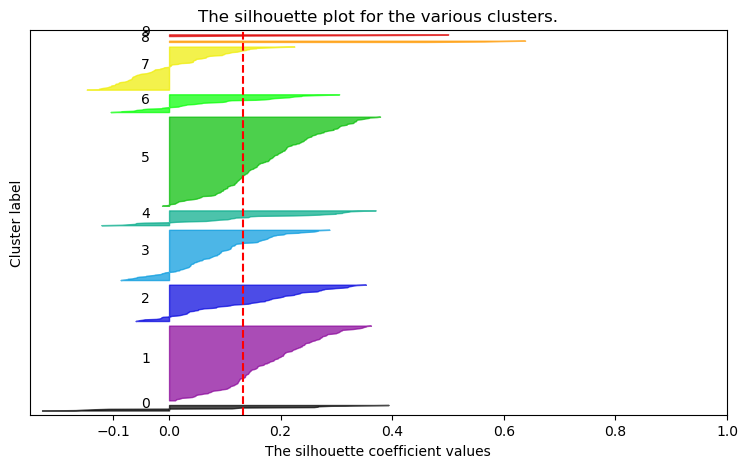

In [28]:
avg_silhouette_scores = []

range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.25, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    avg_silhouette_scores.append(silhouette_avg)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

Checking the silhouette coefficent values shows that the model did a poor job of clustering the data. I'll look at next if I over processed the data again by redoing the preprocessing and running the algorithm again.

In [40]:
data = pd.read_csv('merged data.csv')
data = data.drop(columns = ['States', 'CensusId', 'IncomeErr', 'IncomePerCapErr'])
X = data.drop(columns=['County', 'State', 'Poverty', 'ChildPoverty', 'Income', 'Citizen'])

C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.8763688018768118


C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.7922579951776668


C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.7610153055983261


C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.7503599735843065


C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.6871117317978213


C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.674944824350707


C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.61736170870688


C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.617045690724535


C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.5798177144180704


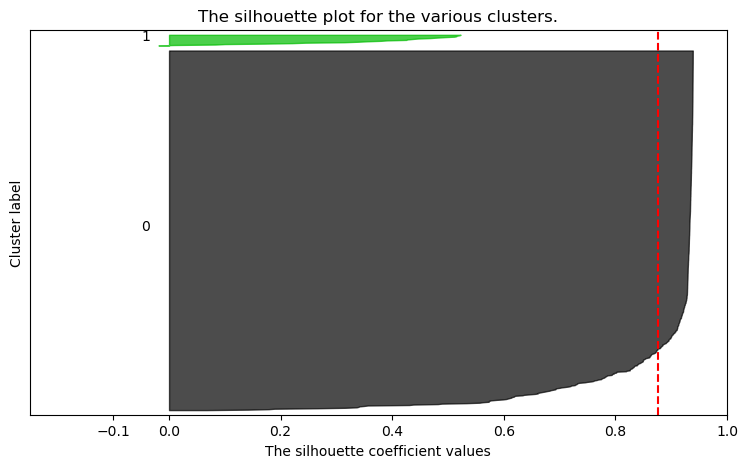

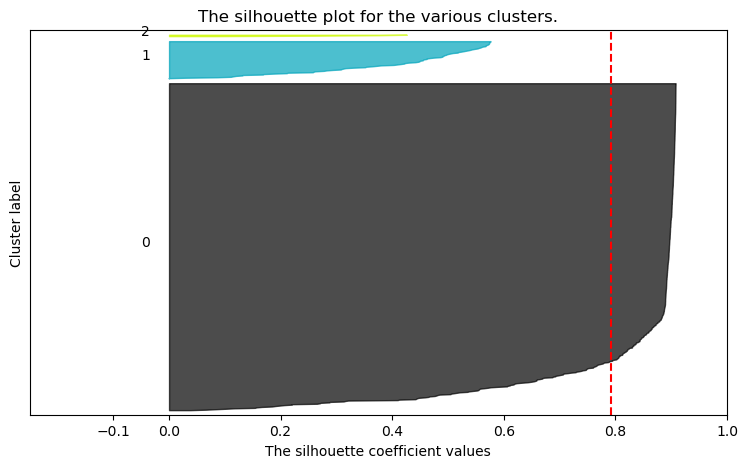

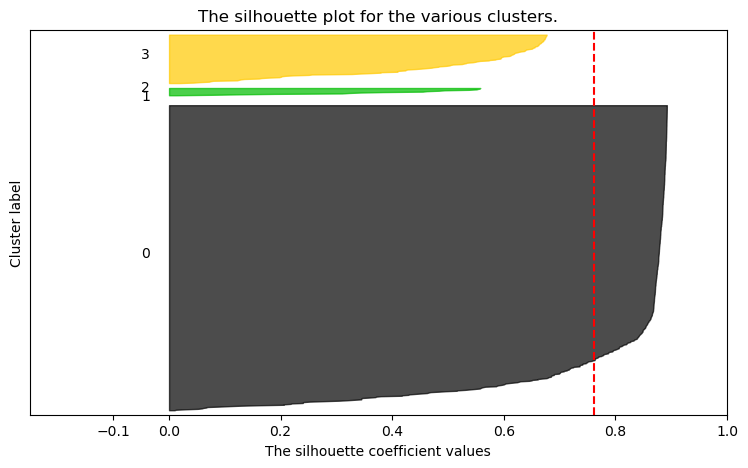

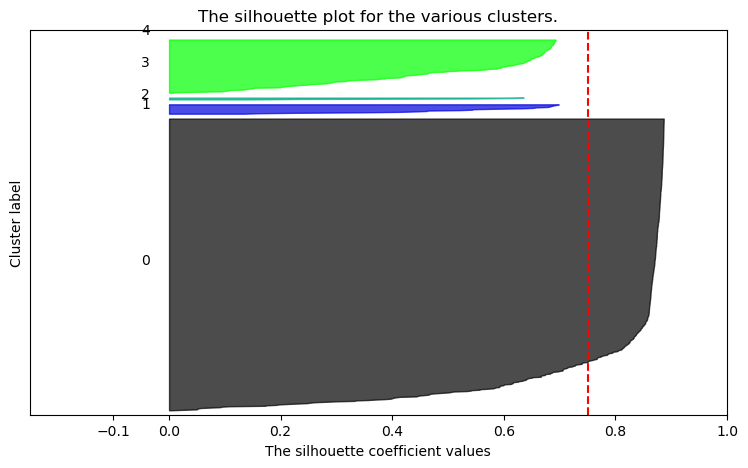

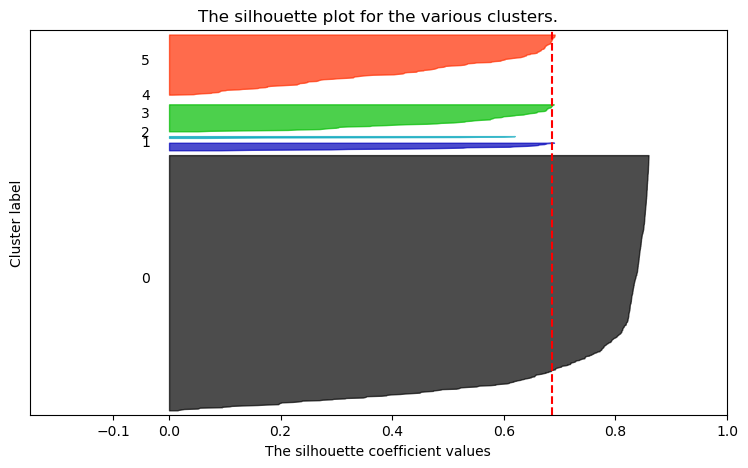

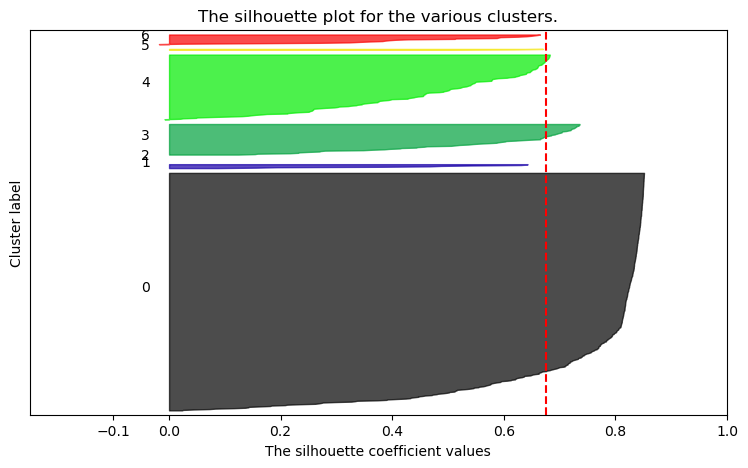

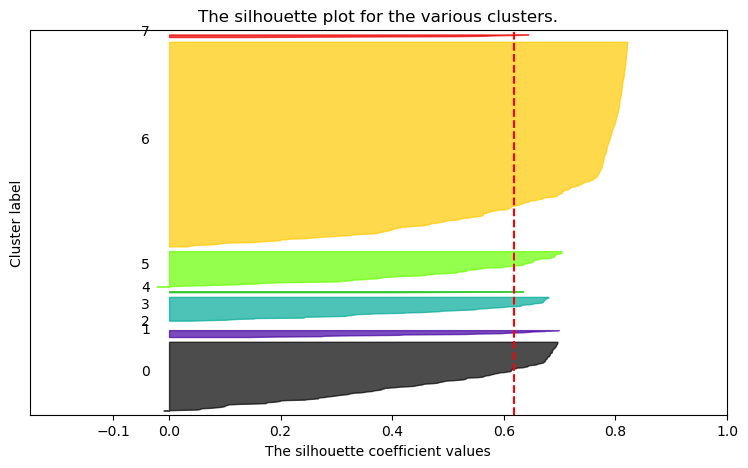

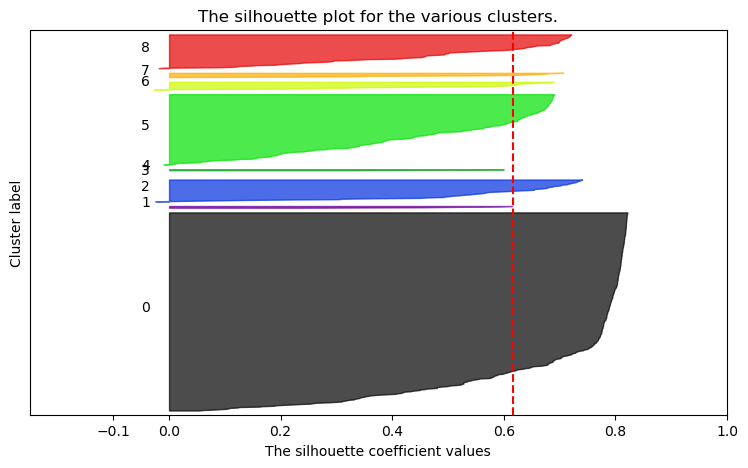

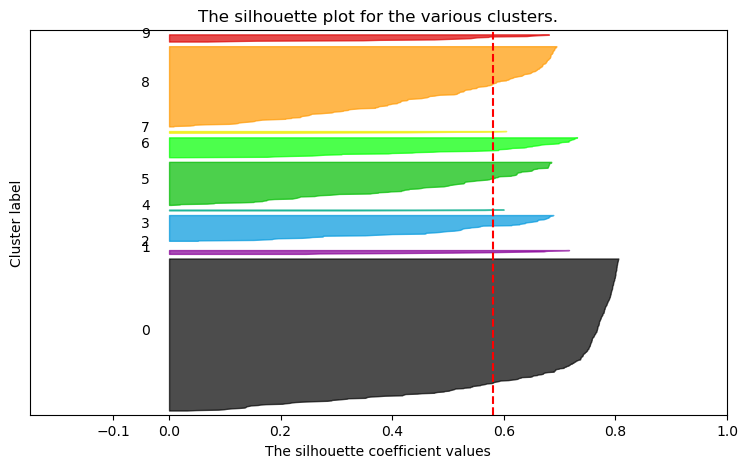

In [33]:
avg_silhouette_scores = []

range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.25, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    avg_silhouette_scores.append(silhouette_avg)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

Text(0, 0.5, 'Average Silhouette Score')

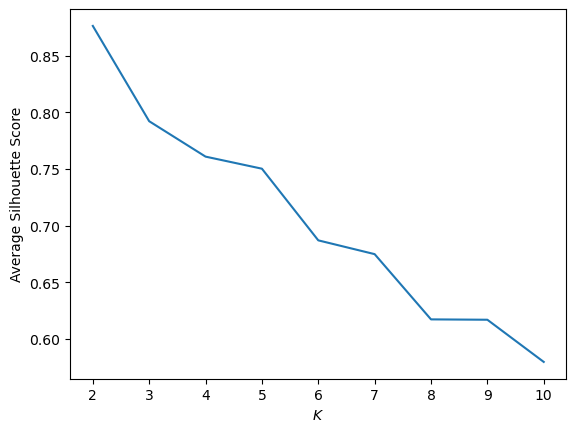

In [34]:
plt.plot(range_n_clusters, avg_silhouette_scores)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")

It produced improved values this time that we could work with. From here we would be able to starting trying to understand what the defining features of the clusters are and iterate on our process more.

<font size="12"> DBSCAN </font>

In [60]:
from sklearn.cluster import DBSCAN

def GridSearch(combinations, X):
    scores = []
    all_label = []

    for i, (eps,num_samples) in enumerate(combinations):
        dbscan_model = DBSCAN(eps=eps, min_samples= num_samples).fit(X)
        labels = dbscan_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -= 1
        if(num_clusters < 2) or (num_clusters > 25):
            scores.append(-20)
            all_label.append('Poor')
            print(' at iteration : ',i,'ep = ',eps,'min_sample =',num_samples,'number of cluster= ',num_clusters,'moving on ..')
            continue
        scores.append(silhouette_score(X,labels))
        all_label.append(labels)
        print(' at iteration: ', i, 'score :', scores[-1],'number of clusters :', num_clusters)
    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_label[best_index]
    best_score = scores[best_index]
    return{'best_epsilon': best_parameters[0],
           'best_min_samples': best_parameters[1],
           'best_labels': best_labels,
           'best_score': best_score}

epsilon = np.linspace(0.01,1,num=20)
min_samples = np.arange(2,25,step=2)

import itertools
combinations = list(itertools.product(epsilon,min_samples))

best_para = GridSearch(combinations, X)
print(best_para)

 at iteration :  0 ep =  0.01 min_sample = 2 number of cluster=  0 moving on ..
 at iteration :  1 ep =  0.01 min_sample = 4 number of cluster=  0 moving on ..
 at iteration :  2 ep =  0.01 min_sample = 6 number of cluster=  0 moving on ..
 at iteration :  3 ep =  0.01 min_sample = 8 number of cluster=  0 moving on ..
 at iteration :  4 ep =  0.01 min_sample = 10 number of cluster=  0 moving on ..
 at iteration :  5 ep =  0.01 min_sample = 12 number of cluster=  0 moving on ..
 at iteration :  6 ep =  0.01 min_sample = 14 number of cluster=  0 moving on ..
 at iteration :  7 ep =  0.01 min_sample = 16 number of cluster=  0 moving on ..
 at iteration :  8 ep =  0.01 min_sample = 18 number of cluster=  0 moving on ..
 at iteration :  9 ep =  0.01 min_sample = 20 number of cluster=  0 moving on ..
 at iteration :  10 ep =  0.01 min_sample = 22 number of cluster=  0 moving on ..
 at iteration :  11 ep =  0.01 min_sample = 24 number of cluster=  0 moving on ..
 at iteration :  12 ep =  0.06

After running K-Means and DBSCAN the best we have found is that K-Means silhouette scores show there may be some information we can gain looking at clustering from the algorithm. Looking at the silhouette graphs however do not inspire much confidence in the clusters that the algorithm generated.